# Halfmoon

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
plt.style.use('ggplot')

In [2]:
def halfmoon (n_samples = 1000,
              rad_min = 50,
              rad_max = 100,
              ang_min = 45, #degrees
              ang_max = 220, #degrees
              dist_type = 'uniform', # either 'uniform' or 'normal'
              rad_std = 10,
              ang_std = 30.0,
              x0 = 0,
              y0 = 0,
              ):
    """
    Generate random data in the form of a halfmoon.

    Arguments:
        n_samples = number of samples.
        rad_min = minimum radius of halfmoon.
        rad_max = maximum radius of halfmoon.
        ang_min = minimum angle of halfmoon in degrees.
        angle = maximum angle of halfmoon in degrees.
        dist_type = type os data distribution \in ['uniform', 'normal'].
        rad_std = radius standard deviation.
        ang_std = angle standar deviation.
        x0 = horizontal offset in cartesian coordinates.
        y0 = vertical offset in cartesian coordinates.

    ## Usage example
    #x, y = halfmoon()
    #plt.scatter(x,y)
    #plt.show()
    """

    # Generate polar data
    if dist_type == str.lower('Uniform'):
        r = rad_min + (rad_max - rad_min) * np.random.random(n_samples)
        t = ang_min + (ang_max - ang_min) * np.random.random(n_samples)

    elif dist_type == str.lower('normal'):
        r = (rad_max + rad_min)/2.0 + rad_std * np.random.randn(n_samples,1)
        t = (ang_max + ang_min)/2.0 + ang_std * np.random.randn(n_samples,1)

    # Convert to cartesian
    x = x0 + r * np.cos(np.deg2rad(t)) 
    y = y0 + r * np.sin(np.deg2rad(t))
    
    x = x.reshape(x.shape[0],1)
    y = y.reshape(y.shape[0],1)
    
    return x, y


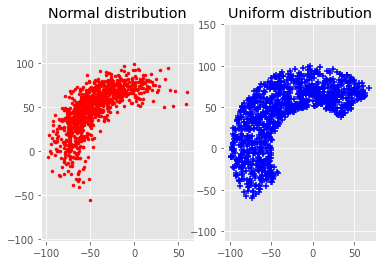

In [3]:
plt.figure(1)
x, y = halfmoon(dist_type = 'normal')
plt.subplot('121'), plt.scatter(x, y, marker='.', c='r')
plt.axis('equal')
plt.title('Normal distribution')

x, y = halfmoon(dist_type = 'uniform')
plt.subplot('122'), plt.scatter(x, y,marker='+', c='b')
plt.axis('equal')
plt.title('Uniform distribution')
plt.show()


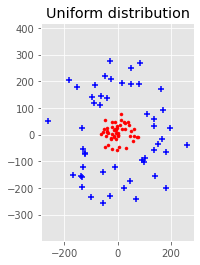

In [16]:
plt.figure(1)
x1_0, x2_0 = halfmoon(
    dist_type = 'uniform',
    n_samples = 50,
    rad_min = 0,
    rad_max = 80,
    ang_min = 0, #degrees
    ang_max = 360, #degrees
)

x1_1, x2_1 = halfmoon(
    dist_type = 'uniform',
    n_samples = 50,
    rad_min = 120,
    rad_max = 280,
    ang_min = 0, #degrees
    ang_max = 360, #degrees
)


plt.subplot('122')
plt.scatter(x1_0, x2_0, marker='.', c='r')
plt.scatter(x1_1, x2_1, marker='+' , c='b')
plt.axis('equal')
plt.title('Uniform distribution')
plt.show()


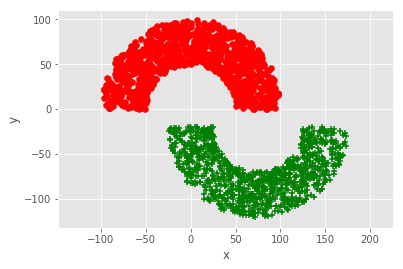

In [ ]:
x, y = halfmoon(dist_type = 'uniform',
                x0 = 0, y0 = 0,
                ang_min = 0,
                ang_max = 180)
X0 = np.concatenate((x,y),axis=1).T

x, y = halfmoon(dist_type = 'uniform',
                x0 = 75, y0 = -20,
                ang_min = 180,
                ang_max = 360)
X1 = np.concatenate((x,y),axis=1).T

plt.figure(2)
plt.scatter(X0[0,:], X0[1,:], marker='o',c='r')
plt.scatter(X1[0,:], X1[1,:], marker='+',c='g')
plt.xlabel('x'), plt.ylabel('y')
plt.axis('equal')
plt.show()